In [3]:
import math
import random
import numpy as np
from typing import List, ClassVar, Callable
import matplotlib.pyplot as plot


In [6]:
class Person:
    def __init__(self, traits: List[float], fitness_function: ClassVar):
        self.fitness: float or None = None
        self.traits = traits

        self.retrospective_coefficient = 0.2
        self.fitness_function: ClassVar = fitness_function

    def calculate_fitness(self):
        self.fitness = self.fitness_function.run(self.traits)

    def improve_traits_from(self, other_person: Person):
        new_traits = []
        for i in range(0, len(self.traits)):
            old_trait = self.traits[i]
            new_trait = self.retrospective_coefficient * old_trait + random.random() * (other_person.traits[i] - old_trait)
            new_traits.append(new_trait)

        new_fitness = self.fitness_function.run(new_traits)
        if self.fitness_function.new_fitness_better_than(old_fitness=self.fitness, new_fitness=new_fitness):
            self.traits = new_traits
            self.fitness = new_fitness

    def acquire_traits_from(self, other_person: Person, best_person: Person):
        new_traits = []
        for i in range(0, len(self.traits)):
            old_trait = self.traits[i]
            new_trait = old_trait + random.random() * (old_trait - other_person.traits[i]) + random.random() * (best_person.traits[i] - old_trait)
            new_traits.append(new_trait)

        new_fitness = self.fitness_function.run(new_traits)
        if self.fitness_function.new_fitness_better_than(old_fitness=self.fitness, new_fitness=new_fitness):
            self.traits = new_traits
            self.fitness = new_fitness

    def has_better_fitness_than(self, other_person: Person) -> bool:
        return self.fitness_function.person_has_better_fitness_than(other_person, self)


In [7]:
class ZakarovFunction:
    @staticmethod
    def run(traits:List)->float:
        j=0
        j=j+1
        return sum((i**2) for i in traits)+(sum((0.5*j*i) for i in traits)**2)+(sum((0.5*j*i) for i in traits)**4)
    
    @staticmethod
    def new_fitness_better_than(old_fitness: float, new_fitness: float) -> bool:
        return new_fitness < old_fitness

    @staticmethod
    def person_has_better_fitness_than(other_person: Person,to_compare_person: Person) -> bool:
        return to_compare_person.fitness < other_person.fitness

In [8]:
class PersonMaker:
    def __init__(self, person_count: int, traits_count: int,traits_range_min: float, traits_range_max: float):
        self.person_count = person_count
        self.traits_count = traits_count
        self.traits_range_min = traits_range_min
        self.traits_range_max = traits_range_max
    def make_persons_with_traits_and_fitness_function(self,make_traits: Callable,fitness_function: ClassVar) -> List[Person]:
        persons = []
        for i in range(0, self.person_count):
            traits = make_traits()
            person = Person(traits, fitness_function)
            persons.append(person)
        return persons
    def make_traits(self) -> List[float]:
        traits = []
        for j in range(0, self.traits_count):
            value = random.uniform(self.traits_range_min, self.traits_range_max)
            traits.append(value)
        return traits
    def make_rounded_off_traits(self) -> List[float]:
        traits = []
        for j in range(0, self.traits_count):
            value = random.uniform(self.traits_range_min, self.traits_range_max)
            value = math.ceil(value) if math.ceil(value) <self.traits_range_max else math.floor(value)
            traits.append(value)
        return traits
    def select_elite(self, population: List[Person]) -> Person:
        best_person = min(population, key=lambda x: x.fitness)
        return best_person


In [9]:
class PopulationGroupE:
    def __init__(self, generations: int, person_maker: PersonMaker,fitness_function: ClassVar):
        self.generations = generations
        self.population: List[Person] = []
        self.person_maker = person_maker
        self.best_person: Person or None = None
        self.fitness_function = fitness_function
        self.best_fitness_history = []
    
    def populate(self):
        self.population =self.person_maker.make_persons_with_traits_and_fitness_function(make_traits=self.person_maker.make_rounded_off_traits,fitness_function=self.fitness_function)
        
    def calculate_population_fitness(self):
        for person in self.population:
            person.calculate_fitness()
    
    def find_best_person(self):
        self.best_person = min(self.population, key=lambda x: x.fitness)
        
    def improve_traits(self):
        for person in self.population:
            if person is not self.best_person:
                person.improve_traits_from(self.best_person)
    
    def acquire_traits(self):
        for idx in range(0, len(self.population)):
            person = self.population[idx]
            random_person = self.population[random.choice([i for i in range(0, len(self.population)) if i != idx])]
            if self.fitness_function.person_has_better_fitness_than(other_person=random_person,to_compare_person=person):
                random_person.acquire_traits_from(person, self.best_person)
            else:
                person.acquire_traits_from(random_person, self.best_person)
                
    def run_generations(self):
        self.calculate_population_fitness()
        elite_person=min(self.population, key=lambda x: x.fitness)
        for _ in range(0, self.generations):
            least_fit_index = max(range(len(self.population)), key=lambda i: self.population[i].fitness)
            least_fit_person = self.population[least_fit_index]
            self.population[least_fit_index] = elite_person
            self.find_best_person()
            self.best_fitness_history.append(self.best_person.fitness)
            self.improve_traits()
            self.find_best_person()
            self.acquire_traits()
            elite_person = self.person_maker.select_elite(self.population)

    

In [10]:
class PopulationGroup:
    def __init__(self, generations: int, person_maker: PersonMaker,fitness_function: ClassVar):
        self.generations = generations
        self.population: List[Person] = []
        self.person_maker = person_maker
        self.best_person: Person or None = None
        self.fitness_function = fitness_function
        self.best_fitness_history = []
    
    def populate(self):
        self.population =self.person_maker.make_persons_with_traits_and_fitness_function(make_traits=self.person_maker.make_rounded_off_traits,fitness_function=self.fitness_function)
        
    def calculate_population_fitness(self):
        for person in self.population:
            person.calculate_fitness()
    
    def find_best_person(self):
        self.best_person = min(self.population, key=lambda x: x.fitness)
        
    def improve_traits(self):
        for person in self.population:
            if person is not self.best_person:
                person.improve_traits_from(self.best_person)
    
    def acquire_traits(self):
        for idx in range(0, len(self.population)):
            person = self.population[idx]
            random_person = self.population[random.choice([i for i in range(0, len(self.population)) if i != idx])]
            if self.fitness_function.person_has_better_fitness_than(other_person=random_person,to_compare_person=person):
                random_person.acquire_traits_from(person, self.best_person)
            else:
                person.acquire_traits_from(random_person, self.best_person)
                
    def run_generations(self):
        self.calculate_population_fitness()
        for _ in range(0, self.generations):
            self.find_best_person()
            self.best_fitness_history.append(self.best_person.fitness)
            self.improve_traits()
            self.find_best_person()
            self.acquire_traits()

    

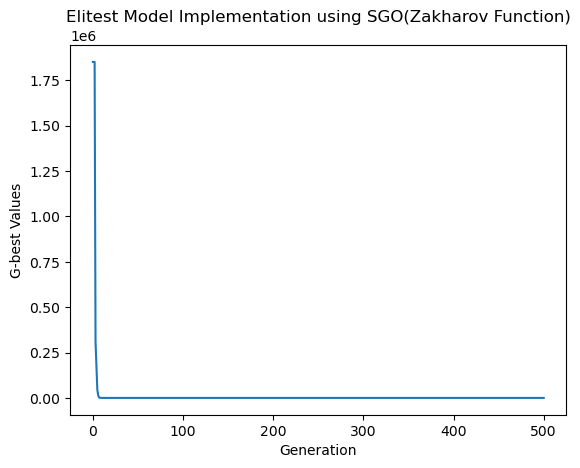

In [11]:
generation_value = 500
population = PopulationGroupE(generations=generation_value,person_maker=PersonMaker(10, 30, -500, 500),fitness_function=ZakarovFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
y1_axis=population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('Elitest Model Implementation using SGO(Zakharov Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)

plot.draw()
plot.show()

In [12]:
print("gbest Values:")
print(y_axis)

gbest Values:
[1850360.0, 1850360.0, 1850360.0, 309322.2843994512, 181100.1530155227, 45065.94311904898, 13079.33847961055, 2319.5496298346607, 458.59192391918634, 115.02486138890045, 8.2519089699359, 0.777195164325247, 0.0497572888947861, 0.0029864287195303413, 0.00012369438405941398, 1.7707037683384684e-05, 3.970117767405626e-06, 1.607397875085084e-07, 8.581157713564251e-09, 2.8686874995117693e-10, 5.514944328210964e-11, 3.0309245109164754e-12, 5.307984999541482e-13, 1.9131062088159426e-14, 6.543758758989761e-16, 6.468530018550643e-17, 2.9346391501782296e-18, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e-19, 1.158303864709734e

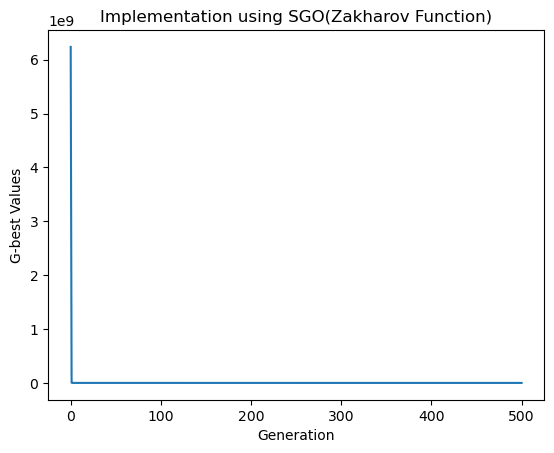

In [13]:
generation_value = 500
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 30, -500, 500),fitness_function=ZakarovFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('Implementation using SGO(Zakharov Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)

plot.draw()
plot.show()

In [14]:
print("gbest Values:")
print(y_axis)

gbest Values:
[6237052498.0, 3304206.331407769, 297344.4830155908, 297344.4830155908, 48282.70643245625, 12103.776574697496, 2793.6687622532663, 1059.911331947641, 1059.911331947641, 481.0831977610362, 80.73594383223296, 12.806355984708421, 9.323443534290204, 5.048985287368526, 0.4176051624858228, 0.12560714780322862, 0.07404481853661785, 0.00905146261063297, 0.002399543233292827, 0.0003920233158997492, 6.746259010157791e-05, 2.715102220106947e-05, 5.59422732008626e-06, 1.1566733175466602e-06, 4.001902330428892e-07, 3.594354570581986e-08, 9.51103164390569e-09, 1.461096860821692e-09, 2.318128343519895e-10, 3.9488374516819845e-11, 4.763866091781473e-12, 8.980989887996077e-13, 2.9945958227061913e-13, 3.154244086608793e-14, 7.92311527867535e-15, 1.0815763285912271e-15, 5.475376488904068e-17, 3.321709649189184e-17, 3.515326814450261e-18, 6.293836783139074e-19, 1.6605301929490871e-19, 3.5510675957377346e-20, 2.5440049013595246e-21, 3.5602977104058836e-22, 9.883163688892404e-23, 3.29036702763

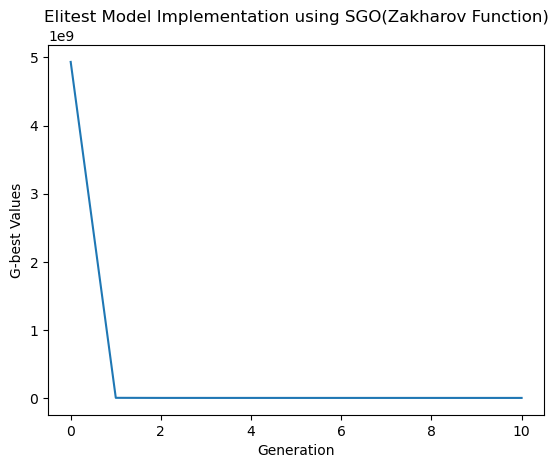

In [15]:
generation_value = 10
population = PopulationGroupE(generations=generation_value,person_maker=PersonMaker(10, 30, -500, 500),fitness_function=ZakarovFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
y1_axis=population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('Elitest Model Implementation using SGO(Zakharov Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis)

plot.draw()
plot.show()

In [16]:
print("gbest Values:")
print(y_axis)

gbest Values:
[4933537122.0, 1358156.7230078666, 200641.72502286878, 122432.83755070544, 122432.83755070544, 38723.420650388915, 38723.420650388915, 38723.420650388915, 12853.69363168486, 2202.2767660466466, 122.09609062254133]


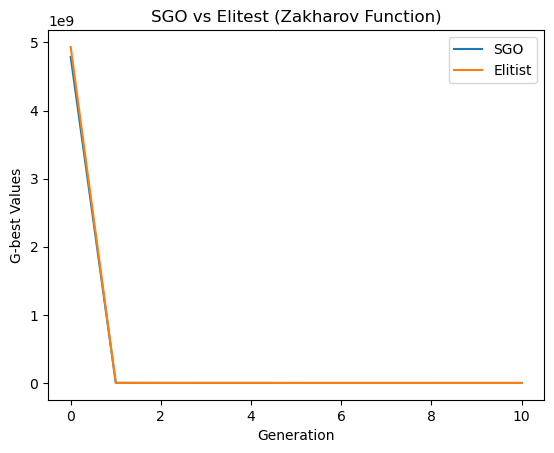

In [48]:
generation_value = 10
population = PopulationGroup(generations=generation_value,person_maker=PersonMaker(10, 30, -500, 500),fitness_function=ZakarovFunction)
population.populate()
population.run_generations()
population.find_best_person()
population.best_fitness_history.append(population.best_person.fitness)
x_axis = range(0, generation_value + 1)
y_axis = population.best_fitness_history.copy()
#print("gbest Values:")
#print(y_axis)
plot.title('SGO vs Elitest (Zakharov Function)')
plot.xlabel('Generation')
plot.ylabel('G-best Values')
plot.plot(x_axis, y_axis, label='SGO')
plot.plot(x_axis, y1_axis, label='Elitist')
plot.legend()


plot.draw()
plot.show()

In [21]:
print("gbest Values:")
print(y_axis)

gbest Values:
[3518014147.3125, 1217672.8723195172, 263785.4685643572, 91108.0166308788, 33054.43935855161, 33054.43935855161, 2756.051790426133, 367.88953876621173, 163.25217082113204, 26.162997153389, 2.436799690457653]
